## import libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

## explore the dataset

In [2]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


## rename the column title

In [4]:
df = df.rename(columns= {'Unnamed: 0': 'code_no'})
df.head()

,code_no,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## Data Visualization

In [5]:
num = df.select_dtypes('number')
z = num.corr()
z.head(3)

,code_no,YearsExperience,Salary
code_no,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


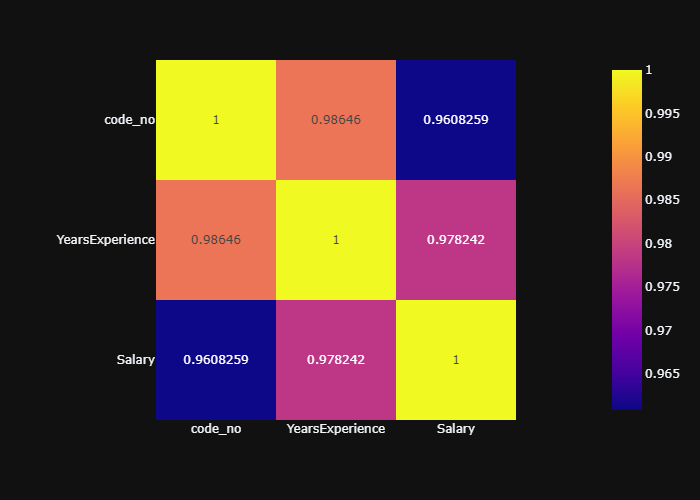

In [6]:
fig = px.imshow(z, text_auto=True, template='plotly_dark')
fig.show(renderer='png')

In [7]:
df2 = df.groupby('YearsExperience')['Salary'].mean().sort_values(ascending=False).reset_index().head(15)
df2.head(3)

,YearsExperience,Salary
0,10.4,122392.0
1,10.6,121873.0
2,9.6,116970.0


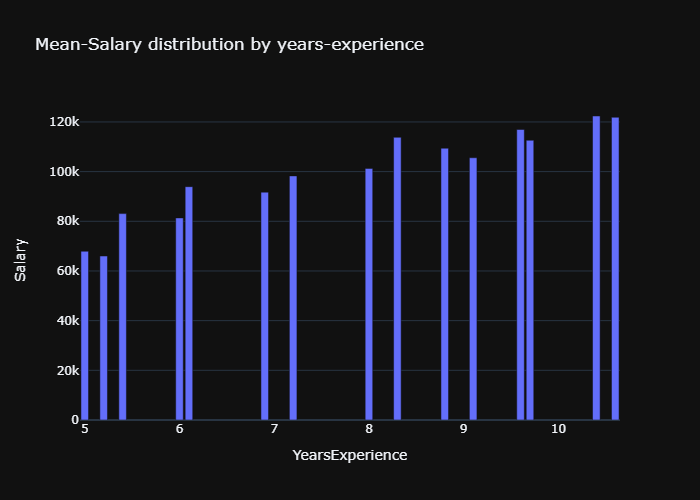

In [8]:
fig = px.bar(df2, x='YearsExperience', y='Salary', template='plotly_dark', title='Mean-Salary distribution by years-experience')
fig.show(renderer='png')

In [9]:
df2 = df.groupby('YearsExperience')['Salary'].max().sort_values(ascending=False).reset_index().head(10)
df2.head(3)

,YearsExperience,Salary
0,10.4,122392.0
1,10.6,121873.0
2,9.6,116970.0


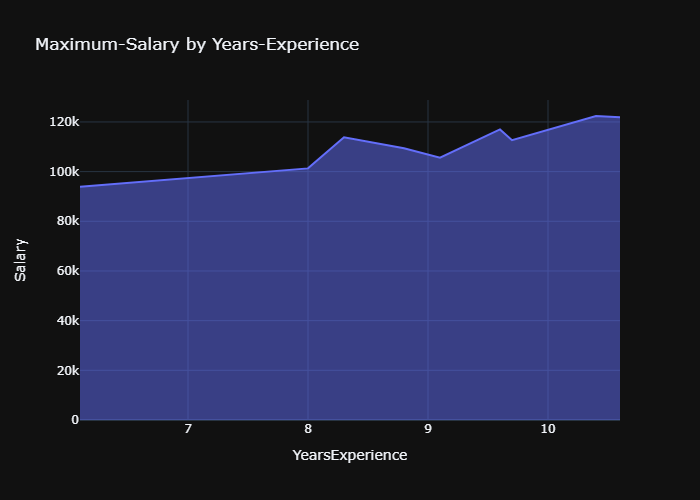

In [10]:
fig = px.area(df2, x='YearsExperience', y='Salary', template='plotly_dark', title='Maximum-Salary by Years-Experience')
fig.show(renderer='png')

In [11]:
df2 = df.groupby('YearsExperience')['Salary'].min().reset_index().head(15)
df2.head(3)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0


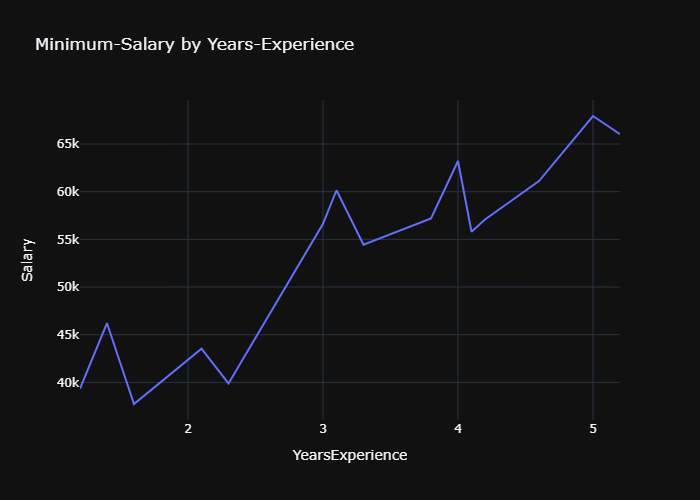

In [12]:
fig = px.line(df2, x='YearsExperience', y='Salary', template='plotly_dark', title='Minimum-Salary by Years-Experience')
fig.show(renderer='png')

In [13]:
df2 = df.groupby('YearsExperience')['Salary'].median().reset_index().head(15)
df2.head(3)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0


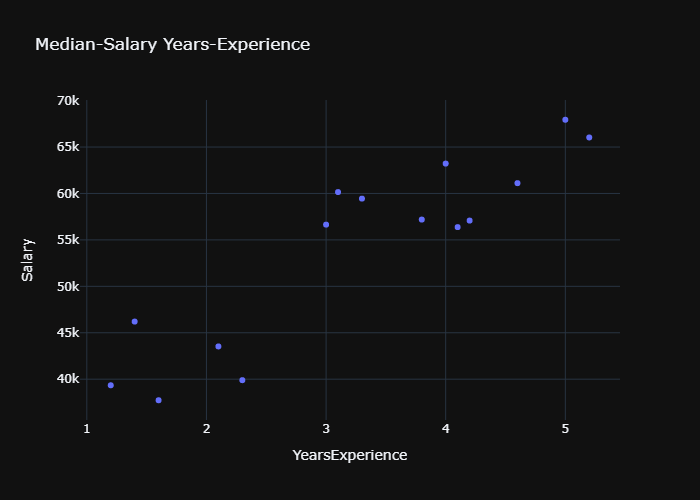

In [14]:
fig = px.scatter(df2, x='YearsExperience', y='Salary', template='plotly_dark', title='Median-Salary Years-Experience')
fig.show(renderer='png')

## convert dataset from float to integer

In [16]:
df = df.astype('int')
df.head()

,code_no,YearsExperience,Salary
0,0,1,39344
1,1,1,46206
2,2,1,37732
3,3,2,43526
4,4,2,39892


## check for duplicated/null values

In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

code_no            0
YearsExperience    0
Salary             0
dtype: int64

## Split the dataset into input(X) and output(y)

In [19]:
X = df.iloc[:, 0:2]
y = df.iloc[:, 2]

## Feature scaling

In [20]:
df.describe()

,code_no,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.100000,76004.000000
std,8.803408,2.771157,27414.429785
min,0.000000,1.000000,37732.000000
25%,7.250000,3.000000,56721.750000
50%,14.500000,4.500000,65238.000000
75%,21.750000,7.750000,100545.750000
max,29.000000,10.000000,122392.000000


In [21]:
from sklearn.preprocessing import RobustScaler
# create an instance of the scaler
scalar = RobustScaler()
X = scalar.fit_transform(X)

In [23]:
import joblib
from joblib import dump

joblib.dump(scalar, 'scala.jobb')

['scala.jobb']

## Split data(X) into training/testing set

In [10]:
from sklearn.model_selection import train_test_split
# make an instance of it
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## modelling my data using xgboost algorithm

In [11]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Convert data to DMatrix, which is the data structure used by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
# Parameters for XGBoost
params = {'max_depth': 3, 'objective': 'reg:squarederror', 'eta': 0.1}

# Train the model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)


## predict using the model

In [12]:
prediction = model.predict(dtest)
prediction

array([116883.41 ,  61127.223, 108523.89 ,  81691.945,  55810.32 ,
        61577.79 ], dtype=float32)

In [13]:
evaluation = mean_absolute_error(y_test, prediction)
print(f"MAE: {evaluation}")

MAE: 5128.136067708333


In [4]:
df['Salary'].describe()

count        30.000000
mean      76004.000000
std       27414.429785
min       37732.000000
25%       56721.750000
50%       65238.000000
75%      100545.750000
max      122392.000000
Name: Salary, dtype: float64

## Save the trained model

In [15]:
import joblib as joblib
from joblib import dump, load


model = joblib.dump(model, 'salary.joblib')
model


['salary.joblib']

In [16]:
df.tail(12)

,code_no,YearsExperience,Salary
18,18,6,81364
19,19,6,93941
20,20,6,91739
21,21,7,98274
22,22,8,101303
23,23,8,113813
24,24,8,109432
25,25,9,105583
26,26,9,116970
27,27,9,112636


## Load the model

In [ ]:
model = joblib.load('salary.joblib')

# Convert new data to DMatrix
# new_dmatrix = xgb.DMatrix([[5, 19]])

# Make predictions on new data
prediction = model.predict(xgb.DMatrix([[1, 9]]))
prediction


array([121760.56], dtype=float32)